In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf

In [175]:
dataset = read_csv("folder/subfolder/dataToModel.csv",index_col= 0,sep=";")

In [176]:
dataset.head()

,rok,ms,dz,godz,fco2_MQ,fco2_HQ,fco2_raw,glwody,T50cm,T2m,...,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
0,2013,1,1,0.5,0.15,0.0,0.15,5.2,1.2,1.5,...,0.9,249.3,322.9,998.5,3.4,210.5,0.6,0.785,0.0,0.0
1,2013,1,1,1.5,-0.60,0.0,-0.60,5.2,0.9,1.2,...,1.0,249.5,323.5,998.1,3.3,202.5,0.6,0.785,0.0,0.0
2,2013,1,1,2.5,0.57,0.0,0.57,5.4,0.7,1.0,...,1.0,249.7,324.0,997.6,3.3,201.6,0.6,0.785,0.0,0.0
3,2013,1,1,3.5,0.03,0.0,0.03,5.5,0.3,0.6,...,0.9,250.0,324.5,997.2,2.6,191.6,0.6,0.785,0.0,0.0
4,2013,1,1,4.5,0.03,0.0,0.03,5.5,-0.4,-0.0,...,1.5,250.2,325.1,996.8,2.2,189.1,0.6,0.785,0.0,0.0


In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [178]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)

In [179]:
dataset.head(2220)

,fco2_HQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
0,0.0,0.15,5.2,1.2,1.5,0.0,0.9,249.3,322.9,998.5,3.4,210.5,0.6,0.785,0.0,0.0
1,0.0,-0.60,5.2,0.9,1.2,0.0,1.0,249.5,323.5,998.1,3.3,202.5,0.6,0.785,0.0,0.0
2,0.0,0.57,5.4,0.7,1.0,0.0,1.0,249.7,324.0,997.6,3.3,201.6,0.6,0.785,0.0,0.0
3,0.0,0.03,5.5,0.3,0.6,0.0,0.9,250.0,324.5,997.2,2.6,191.6,0.6,0.785,0.0,0.0
4,0.0,0.03,5.5,-0.4,-0.0,0.0,1.5,250.2,325.1,996.8,2.2,189.1,0.6,0.785,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1.0,-5.00,3.6,20.4,19.5,665.8,80.1,327.0,443.0,1001.2,0.6,19.7,17.4,0.774,1347.1,70.6
2216,1.0,-6.26,3.4,21.6,20.8,770.0,85.6,332.4,455.7,1000.9,1.1,2.0,17.6,0.774,1575.5,70.7
2217,1.0,-0.04,3.2,22.5,21.9,841.9,91.9,337.6,465.5,1000.9,1.4,38.9,17.9,0.773,1738.3,74.9
2218,0.0,-2.90,3.1,23.1,22.5,876.3,98.5,340.0,471.3,1000.7,1.2,81.7,18.5,0.773,1798.4,85.1


In [180]:
values = dataset.values
values = values.astype('float64')

In [181]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)

In [182]:
scaled.head(2220)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.518109,0.869646,0.413005,0.423423,0.000000,0.001652,0.334327,0.347342,0.535762,0.293103,0.584722,0.045045,0.795009,0.000000,0.000000
1,0.0,0.517643,0.869646,0.407733,0.418018,0.000000,0.001836,0.334990,0.349252,0.530364,0.284483,0.562500,0.045045,0.795009,0.000000,0.000000
2,0.0,0.518370,0.871508,0.404218,0.414414,0.000000,0.001836,0.335653,0.350844,0.523617,0.284483,0.560000,0.045045,0.795009,0.000000,0.000000
3,0.0,0.518034,0.872439,0.397188,0.407207,0.000000,0.001652,0.336647,0.352436,0.518219,0.224138,0.532222,0.045045,0.795009,0.000000,0.000000
4,0.0,0.518034,0.872439,0.384886,0.396396,0.000000,0.002753,0.337309,0.354346,0.512821,0.189655,0.525278,0.045045,0.795009,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1.0,0.514905,0.854749,0.750439,0.747748,0.669213,0.147026,0.591783,0.729704,0.572200,0.051724,0.054722,0.801802,0.775401,0.655204,0.051001
2216,1.0,0.514121,0.852886,0.771529,0.771171,0.773947,0.157122,0.609675,0.770137,0.568151,0.094828,0.005556,0.810811,0.775401,0.766294,0.051073
2217,1.0,0.517991,0.851024,0.787346,0.790991,0.846216,0.168686,0.626905,0.801337,0.568151,0.120690,0.108056,0.824324,0.773619,0.845477,0.054107
2218,0.0,0.516212,0.850093,0.797891,0.801802,0.880792,0.180800,0.634858,0.819803,0.565452,0.103448,0.226944,0.851351,0.773619,0.874708,0.061475


In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fco2_HQ   40342 non-null  float64
 1   fco2_raw  40342 non-null  float64
 2   glwody    40342 non-null  float64
 3   T50cm     40342 non-null  float64
 4   T2m       40342 non-null  float64
 5   Kd        40342 non-null  float64
 6   Ku        40342 non-null  float64
 7   Ld        40342 non-null  float64
 8   Lu        40342 non-null  float64
 9   ppp       40342 non-null  float64
 10  v         40342 non-null  float64
 11  vdir      40342 non-null  float64
 12  Tgrunt    40342 non-null  float64
 13  vwc       40342 non-null  float64
 14  PARd      40342 non-null  float64
 15  PARu      40342 non-null  float64
dtypes: float64(16)
memory usage: 5.2 MB


In [184]:
dataset.shape

(40342, 16)

In [185]:
list0 = []
list1 = []
i=0
w=4
for window in scaled.rolling(window=w):
   # print(window.shape)
    if(window.shape==(w,window.shape[1])):
        i+=1
        #print("Number of window "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        for index, test in window.iterrows() :
           # print(y)
            if (y==w-1) :
                #print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1

In [186]:
#print(list0)

In [187]:
dataFromSensors=np.array(list0)

In [188]:
#print(dataFromSensors)

In [189]:
np.info(dataFromSensors)

class:  ndarray
shape:  (40339, 4, 16)
strides:  (512, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7f78a15b9000
byteorder:  little
byteswap:  False
type: float64


In [190]:
#print(list1)

In [191]:
labels=np.array(list1)

In [192]:
#print(labels)

In [193]:
np.info(labels)

class:  ndarray
shape:  (40339,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7f789f35f000
byteorder:  little
byteswap:  False
type: float64


In [194]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [195]:
training_sample_labels

32271

In [196]:
training_sample

32271

In [197]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [198]:
train_X.shape

(32271, 4, 15)

In [199]:
train_y

array([0., 0., 0., ..., 0., 0., 1.])

In [200]:
#print(train_X)

In [201]:
train_y.shape

(32271,)

In [202]:
#print(test_y)

In [203]:
train_y=train_y.reshape(train_y.shape[0],1)

In [204]:
test_y=test_y.reshape(test_y.shape[0],1)

In [205]:
#print(train_X)

In [206]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))



print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32271, 4, 15) (32271, 1) (8068, 4, 15) (8068, 1)


In [207]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(176,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    #keras.layers.Flatten(),
   # keras.layers.GRU(units=128,return_sequences=True),
    #keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=88,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=44,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=22,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [208]:
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 4, 176)            101904    
                                                                 
 gru_16 (GRU)                (None, 4, 88)             70224     
                                                                 
 gru_17 (GRU)                (None, 44)                17688     
                                                                 
 dense_10 (Dense)            (None, 22)                990       
                                                                 
 dense_11 (Dense)            (None, 1)                 23        
                                                                 
Total params: 190,829
Trainable params: 190,829
Non-trainable params: 0
_________________________________________________________________


In [209]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=150,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/150
253/253 [==============================] - 32s 56ms/step - loss: 0.5086 - accuracy: 0.7793 - val_loss: 0.4877 - val_accuracy: 0.7805
Epoch 2/150
253/253 [==============================] - 12s 48ms/step - loss: 0.4569 - accuracy: 0.7959 - val_loss: 0.4507 - val_accuracy: 0.7847
Epoch 3/150
253/253 [==============================] - 13s 50ms/step - loss: 0.4346 - accuracy: 0.8032 - val_loss: 0.4274 - val_accuracy: 0.7942
Epoch 4/150
253/253 [==============================] - 14s 56ms/step - loss: 0.4232 - accuracy: 0.8080 - val_loss: 0.4164 - val_accuracy: 0.8018
Epoch 5/150
253/253 [==============================] - 15s 60ms/step - loss: 0.4169 - accuracy: 0.8102 - val_loss: 0.4131 - val_accuracy: 0.8040
Epoch 6/150
253/253 [==============================] - 14s 57ms/step - loss: 0.4061 - accuracy: 0.8133 - val_loss: 0.4047 - val_accuracy: 0.8069
Epoch 7/150
253/253 [==============================] - 12s 48ms/step - loss: 0.4026 - accuracy: 0.8138 - val_loss: 0.4056 - val_ac

253/253 [==============================] - 12s 47ms/step - loss: 0.3160 - accuracy: 0.8497 - val_loss: 0.4480 - val_accuracy: 0.8040
Epoch 58/150
253/253 [==============================] - 12s 47ms/step - loss: 0.3111 - accuracy: 0.8513 - val_loss: 0.4566 - val_accuracy: 0.7973
Epoch 59/150
253/253 [==============================] - 12s 46ms/step - loss: 0.3099 - accuracy: 0.8522 - val_loss: 0.4584 - val_accuracy: 0.7985
Epoch 60/150
253/253 [==============================] - 11s 44ms/step - loss: 0.3105 - accuracy: 0.8516 - val_loss: 0.4481 - val_accuracy: 0.8030
Epoch 61/150
253/253 [==============================] - 11s 43ms/step - loss: 0.3077 - accuracy: 0.8540 - val_loss: 0.4753 - val_accuracy: 0.8011
Epoch 62/150
253/253 [==============================] - 12s 46ms/step - loss: 0.3060 - accuracy: 0.8561 - val_loss: 0.4623 - val_accuracy: 0.7966
Epoch 63/150
253/253 [==============================] - 12s 47ms/step - loss: 0.3055 - accuracy: 0.8550 - val_loss: 0.4645 - val_accuracy

253/253 [==============================] - 13s 51ms/step - loss: 0.1980 - accuracy: 0.9111 - val_loss: 0.6806 - val_accuracy: 0.7802
Epoch 114/150
253/253 [==============================] - 15s 61ms/step - loss: 0.1967 - accuracy: 0.9117 - val_loss: 0.6785 - val_accuracy: 0.7872
Epoch 115/150
253/253 [==============================] - 14s 57ms/step - loss: 0.1865 - accuracy: 0.9177 - val_loss: 0.7088 - val_accuracy: 0.7846
Epoch 116/150
253/253 [==============================] - 13s 52ms/step - loss: 0.1869 - accuracy: 0.9171 - val_loss: 0.7276 - val_accuracy: 0.7780
Epoch 117/150
253/253 [==============================] - 13s 49ms/step - loss: 0.1921 - accuracy: 0.9143 - val_loss: 0.7135 - val_accuracy: 0.7809
Epoch 118/150
253/253 [==============================] - 12s 49ms/step - loss: 0.1952 - accuracy: 0.9132 - val_loss: 0.7267 - val_accuracy: 0.7758
Epoch 119/150
253/253 [==============================] - 13s 50ms/step - loss: 0.1857 - accuracy: 0.9172 - val_loss: 0.7600 - val_ac

In [210]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 2s 4ms/step


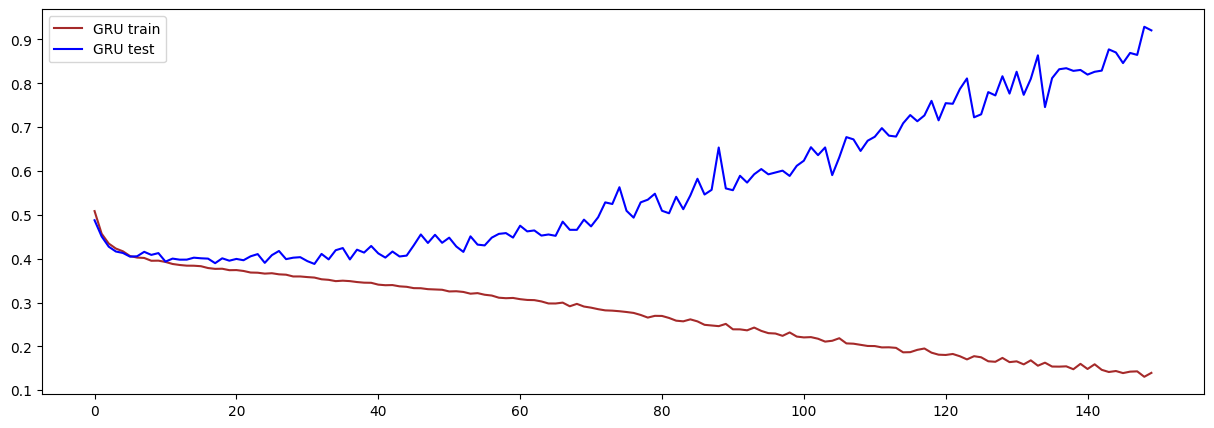

In [211]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [212]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [213]:
np.shape(pred_y)

(8068, 1)

In [214]:
pred_y

array([[0.9640589 ],
       [0.8950395 ],
       [0.9050777 ],
       ...,
       [0.32892376],
       [0.3067462 ],
       [0.5080867 ]], dtype=float32)

In [215]:
#pred_y=np.reshape(pred_y,8068)
pred_y=np.reshape(pred_y,8068)

0.18987711959881584
0.015034443651073759
0.4357489180695872
0.23430156107431696


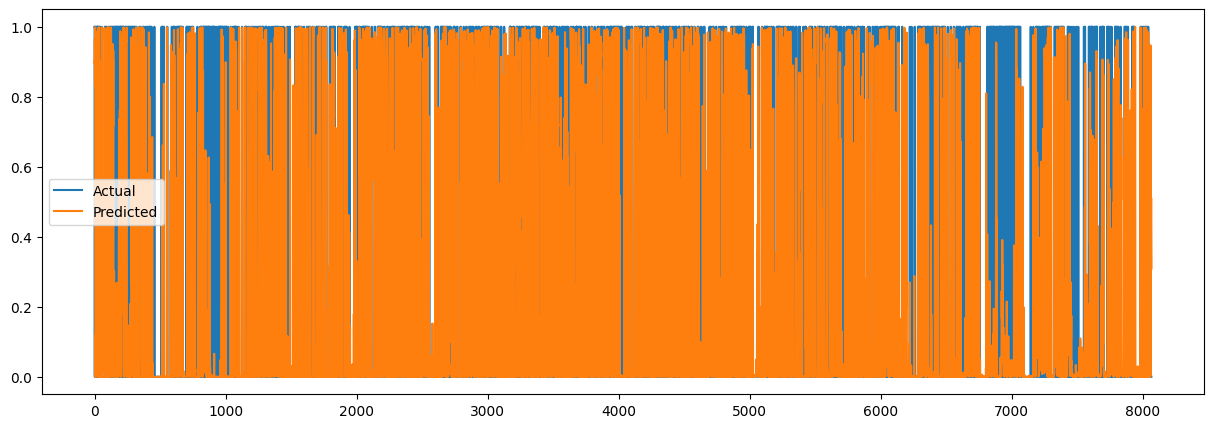

In [216]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [217]:
np.shape(train_X)

(32271, 4, 15)

In [218]:
np.shape(train_y)

(32271, 1)

In [219]:
np.shape(test_X)

(8068, 4, 15)

In [220]:
np.shape(test_y)

(8068, 1)

1261/1261 [==============================] - 5s 4ms/step


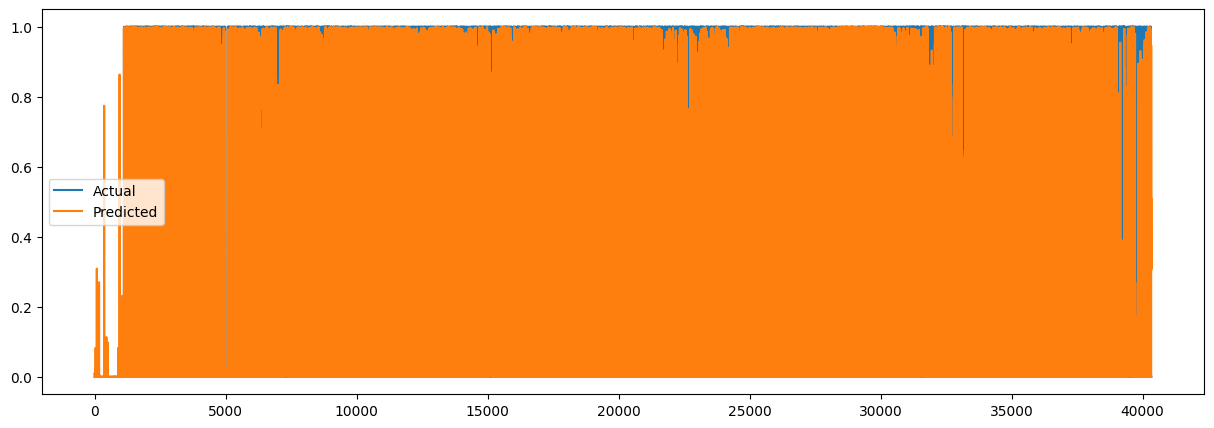

In [221]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

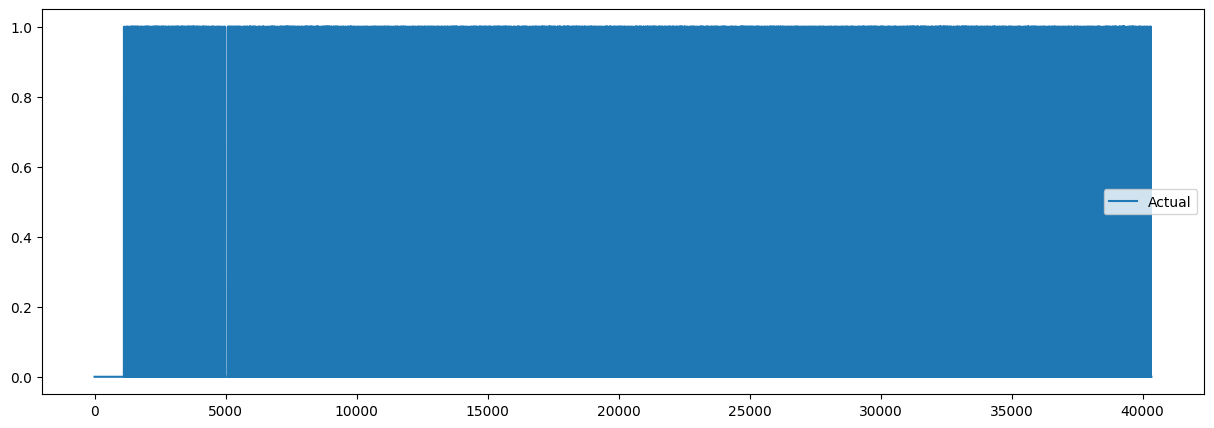

In [222]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [223]:
print(sum(tes)/len(tes))

[0.24180074]


In [224]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.80957189]
[0.94296041]
total acc [0.91021096]


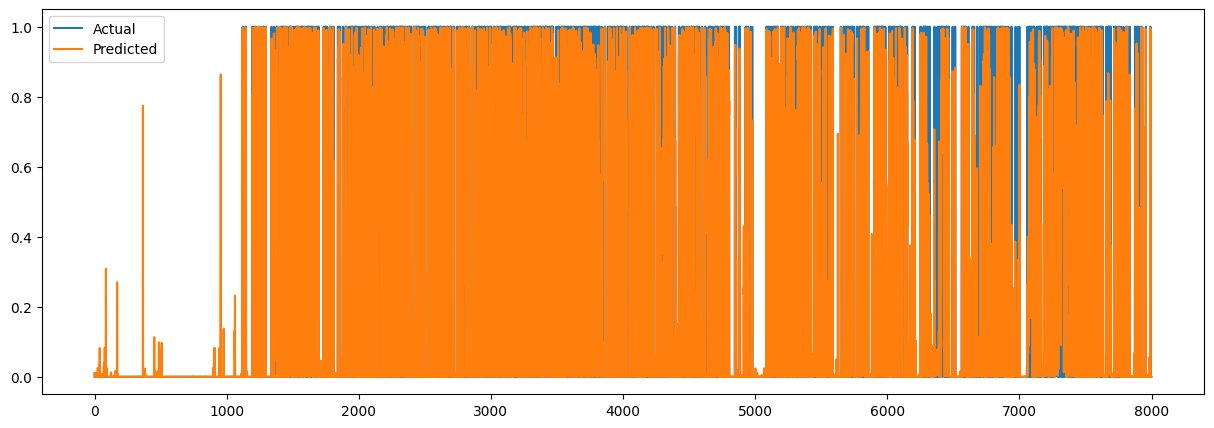

In [225]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

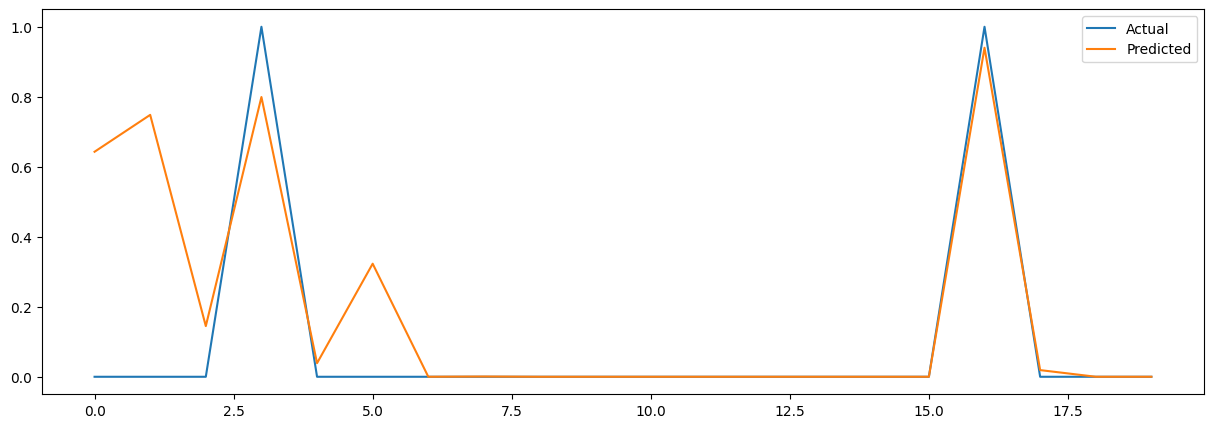

In [226]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

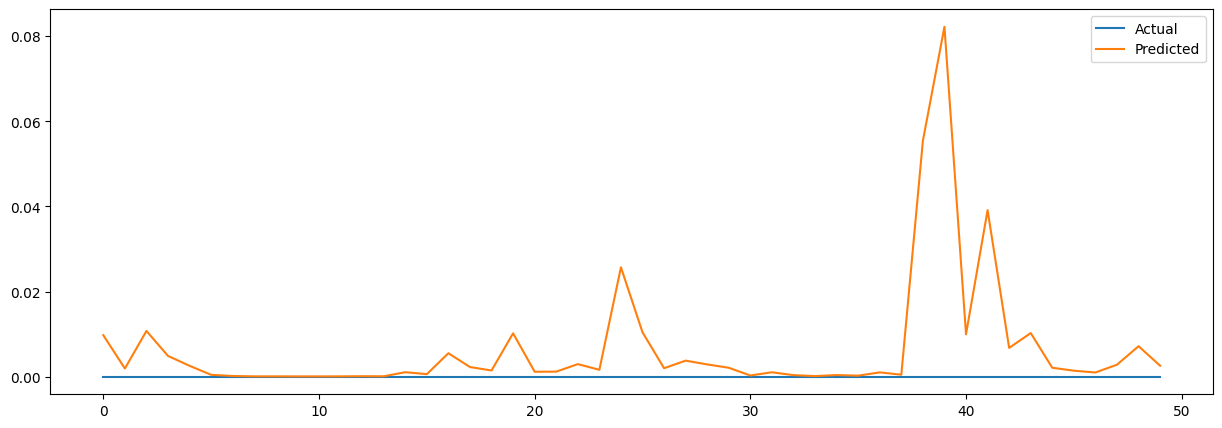

In [227]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

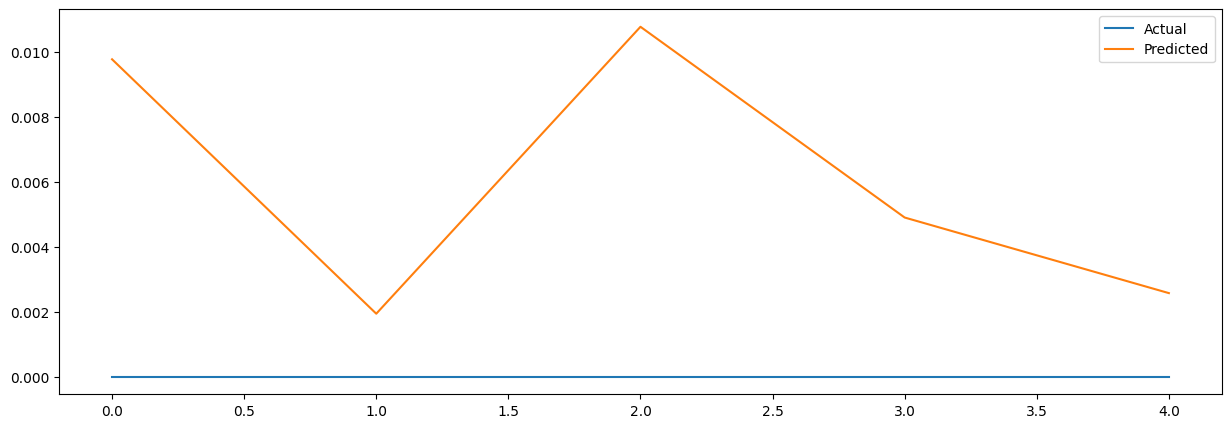

In [228]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

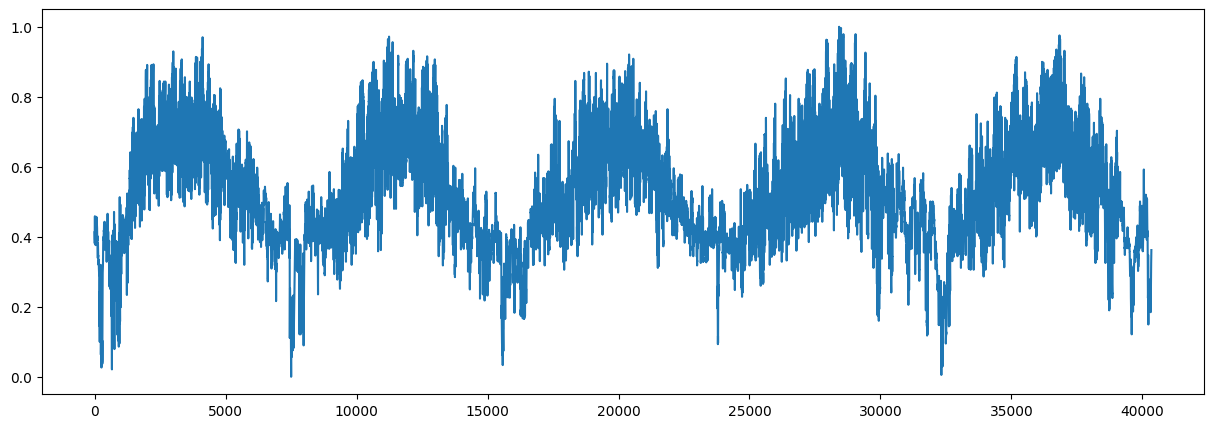

In [229]:
plt.plot(scaled[3], label = 'Actual')

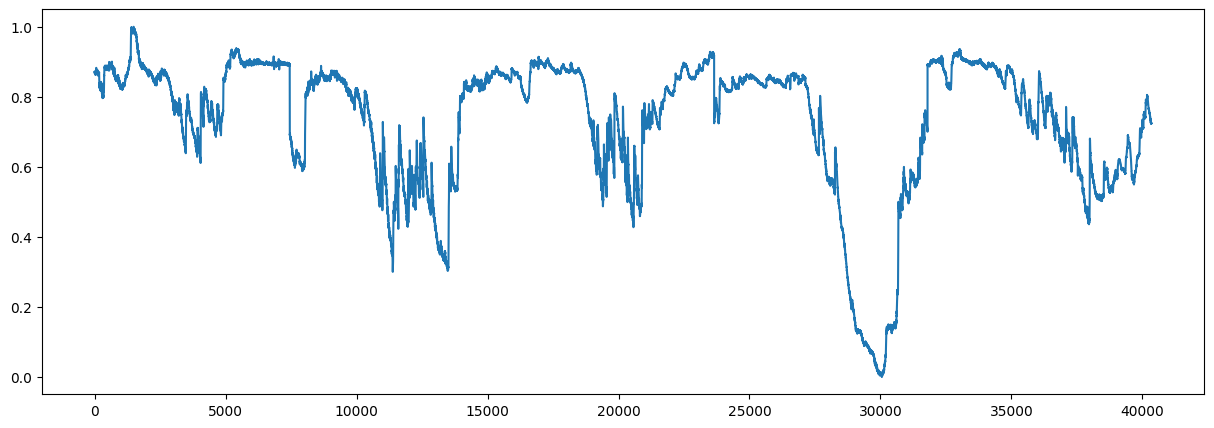

In [230]:
plt.plot(scaled[2], label = 'Actual')

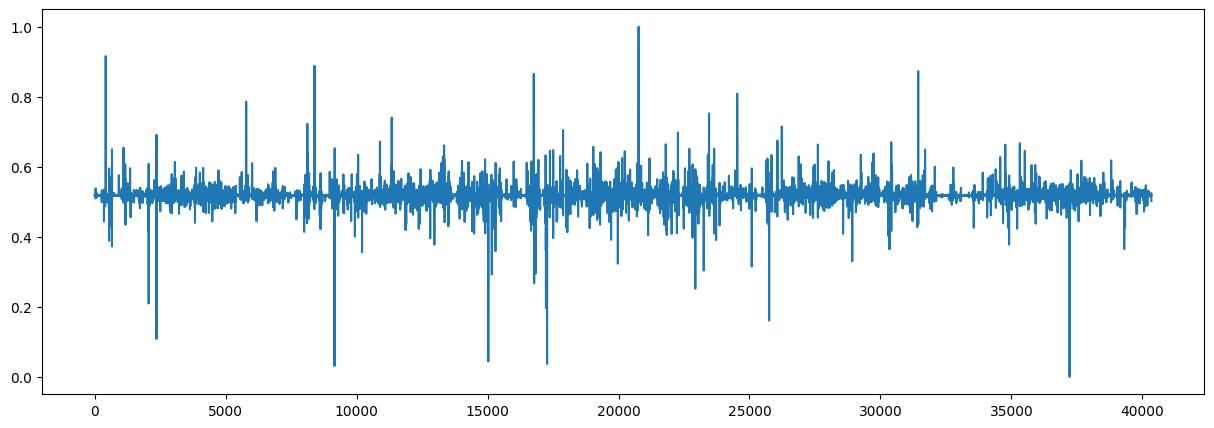

In [231]:
plt.plot(scaled[1], label = 'Actual')

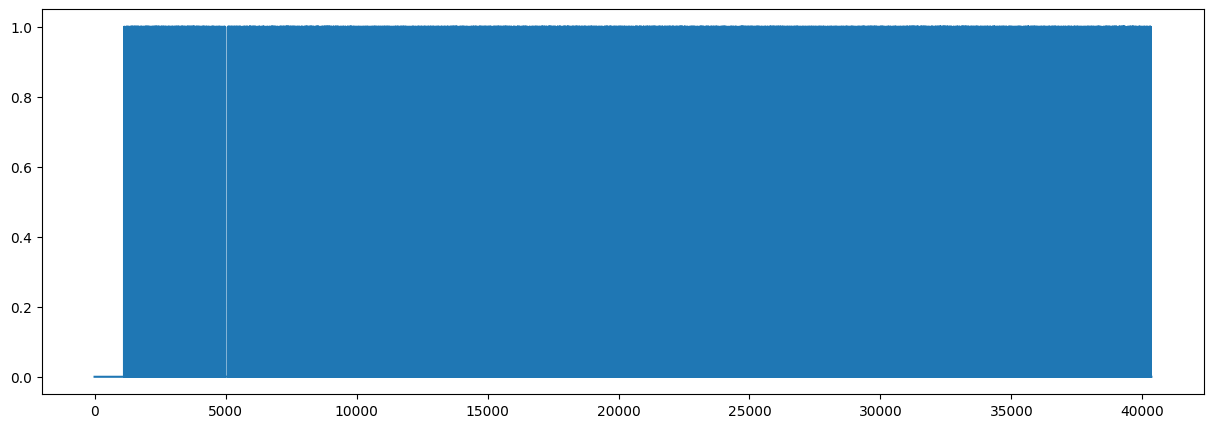

In [232]:
plt.plot(scaled[0], label = 'Actual')

In [233]:
dataToValidateWithModel = read_csv("folder/subfolder/dataToModel_5min.csv",index_col= 0,sep=";")

In [234]:
dataToValidateWithModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475336 entries, 1308 to 105407
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rok       475336 non-null  int64  
 1   ms        475336 non-null  int64  
 2   dz        475336 non-null  int64  
 3   go        475336 non-null  int64  
 4   fco2_MQ   298211 non-null  float64
 5   fco2_HQ   475336 non-null  float64
 6   fco2_raw  475336 non-null  float64
 7   glwody    475336 non-null  float64
 8   T50cm     475336 non-null  float64
 9   T2m       475336 non-null  float64
 10  Kd        475336 non-null  float64
 11  Ku        475336 non-null  float64
 12  Ld        475336 non-null  float64
 13  Lu        475336 non-null  float64
 14  ppp       475336 non-null  float64
 15  v         475336 non-null  float64
 16  vdir      475336 non-null  float64
 17  Tgrunt    475336 non-null  float64
 18  vwc       475336 non-null  float64
 19  PARd      475336 non-null  float64
 20  P

In [235]:
dataToValidateWithModel.drop(columns  = ['dz','go','ms','dz','fco2_MQ','rok'], inplace = True)

In [236]:
dataToValidateWithModel.head()

,fco2_HQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
1308,0.0,-0.41,4.7,0.6,0.3,25.6,1.8,309.6,316.7,1002.9,4.2,337.3,0.6,0.788,54.1,2.6
1309,0.0,0.69,4.7,0.6,0.3,31.7,2.2,309.3,316.8,1002.9,4.8,337.8,0.6,0.788,65.9,3.1
1310,0.0,0.51,4.7,0.6,0.3,23.5,1.6,310.0,316.7,1002.8,5.4,337.8,0.6,0.788,49.7,2.4
1311,0.0,0.17,4.7,0.6,0.4,32.6,2.3,309.4,316.8,1002.7,5.1,333.1,0.7,0.788,67.2,3.3
1312,0.0,1.23,4.7,0.6,0.3,28.5,2.0,309.1,316.7,1002.5,4.9,334.9,0.7,0.788,59.4,2.9


In [237]:
dataToValidateWithModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475336 entries, 1308 to 105407
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fco2_HQ   475336 non-null  float64
 1   fco2_raw  475336 non-null  float64
 2   glwody    475336 non-null  float64
 3   T50cm     475336 non-null  float64
 4   T2m       475336 non-null  float64
 5   Kd        475336 non-null  float64
 6   Ku        475336 non-null  float64
 7   Ld        475336 non-null  float64
 8   Lu        475336 non-null  float64
 9   ppp       475336 non-null  float64
 10  v         475336 non-null  float64
 11  vdir      475336 non-null  float64
 12  Tgrunt    475336 non-null  float64
 13  vwc       475336 non-null  float64
 14  PARd      475336 non-null  float64
 15  PARu      475336 non-null  float64
dtypes: float64(16)
memory usage: 61.7 MB


In [238]:
values = dataToValidateWithModel.values
values = values.astype('float64')

In [239]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)

In [240]:
list0 = []
list1 = []
i=0
w=4
for window in scaled.rolling(window=w):
    #print(window.shape)
    if(window.shape==(w,window.shape[1])):
        i+=1
        #print("Number of window "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        for index, test in window.iterrows() :
           # print(y)
            if (y==w-1) :
               # print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1

In [241]:
dataFromSensors=np.array(list0)

In [242]:
labels=np.array(list1)

In [243]:
test_labels = labels[:]
test = dataFromSensors[:, :, :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]

test_X, test_y = test[:,:, 1:], test_labels[:]

In [244]:
test_y=test_y.reshape(test_y.shape[0],1)

In [245]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32271, 4, 15) (32271, 1) (475333, 4, 15) (475333, 1)


In [246]:
valideteDatapred_y =  model_gru.predict(test_X)

14855/14855 [==============================] - 64s 4ms/step


In [247]:
valideteDatapred_y=np.reshape(valideteDatapred_y, 475333)

14855/14855 [==============================] - 64s 4ms/step


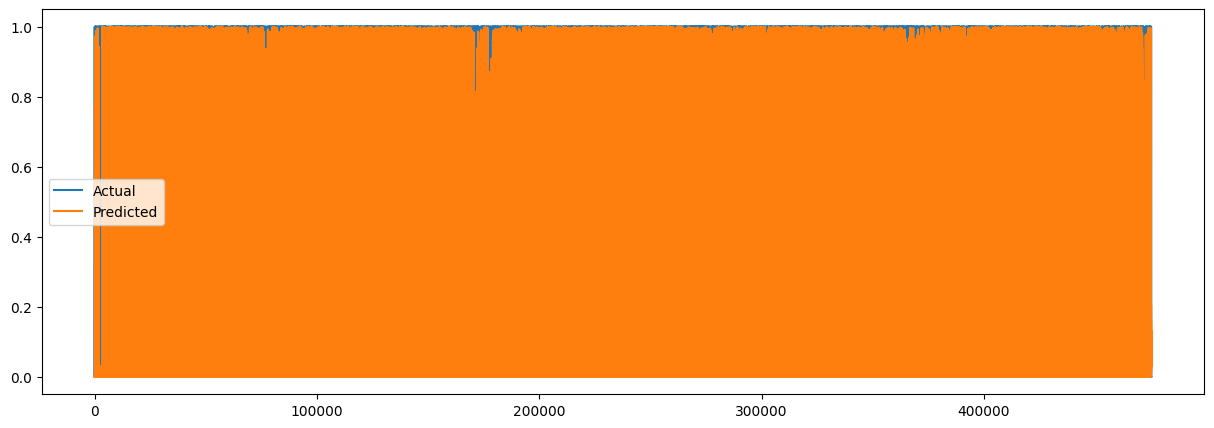

In [248]:
tra = np.concatenate([test_X])
tes = np.concatenate([test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

In [255]:
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.45142989]
[0.81799034]
total acc [0.71468423]
